In [3]:
#import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
ethereum_ts = pd.read_csv("I:/CQAI/TSA/TSD/TSD/archive/ETH-USD (2017-2024).csv",parse_dates=["Date"],index_col=["Date"])
bitcoin_ts =pd.read_csv("I:/CQAI/TSA/TSD/TSD/archive/BTC-USD (2014-2024).csv",parse_dates=["Date"],index_col=["Date"])


In [5]:
bitcoin_ts=bitcoin_ts.loc["2020-01-01":]


In [6]:
bitcoin_ts

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,1.856566e+10
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,2.080208e+10
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,2.811148e+10
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,1.844427e+10
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,1.972507e+10
...,...,...,...,...,...,...
2024-01-17,43132.101563,43189.890625,42189.308594,42742.652344,42742.652344,2.085123e+10
2024-01-18,42742.312500,42876.347656,40631.171875,41262.058594,41262.058594,2.521836e+10
2024-01-19,41278.460938,42134.160156,40297.457031,41618.406250,41618.406250,2.575241e+10


In [7]:
ethereum_ts=ethereum_ts.loc["2020-01-01":]

In [8]:
ethereum_ts["Bitcoin_close"]=bitcoin_ts["Close"]
ethereum_ts["Bitcoin_high"]=bitcoin_ts["High"]


In [9]:
print("Columns:\n",ethereum_ts.columns)

Columns:
 Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Bitcoin_close',
       'Bitcoin_high'],
      dtype='object')


In [10]:
print("No of nan rows:\n",ethereum_ts.isnull().sum())

No of nan rows:
 Open             1
High             1
Low              1
Close            1
Adj Close        1
Volume           1
Bitcoin_close    1
Bitcoin_high     1
dtype: int64


In [11]:
ethereum_ts =ethereum_ts.dropna()

In [12]:
print("rows and cols",ethereum_ts.shape)

rows and cols (1481, 8)


In [13]:
ethereum_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1481 entries, 2020-01-01 to 2024-01-21
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           1481 non-null   float64
 1   High           1481 non-null   float64
 2   Low            1481 non-null   float64
 3   Close          1481 non-null   float64
 4   Adj Close      1481 non-null   float64
 5   Volume         1481 non-null   float64
 6   Bitcoin_close  1481 non-null   float64
 7   Bitcoin_high   1481 non-null   float64
dtypes: float64(8)
memory usage: 104.1 KB


In [14]:
ethereum_ts.describe()

,Open,High,Low,Close,Adj Close,Volume,Bitcoin_close,Bitcoin_high
count,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1.481000e+03,1481.000000,1481.000000
mean,1724.327314,1772.528346,1671.729678,1725.424698,1725.667777,1.606665e+10,29090.961482,29730.786722
std,1104.720006,1137.172203,1067.072056,1103.838962,1103.581607,1.024136e+10,15110.464598,15518.061353
min,110.406784,116.021622,95.184303,110.605873,110.605873,2.081626e+09,4970.788086,5331.833984
25%,993.400635,1083.418945,912.305359,1038.191650,1038.191650,8.872977e+09,17091.144531,17216.826172
50%,1691.263184,1735.809814,1651.959839,1691.658081,1691.658081,1.409483e+10,27530.785156,28047.238281
75%,2302.081299,2376.749756,2209.537109,2309.046387,2309.046387,2.021285e+10,40538.011719,41527.785156
max,4810.071289,4891.704590,4718.039063,4812.087402,4812.087402,8.448291e+10,67566.828125,68789.625000


In [15]:
ethereum_ts.head(10)

,Open,High,Low,Close,Adj Close,Volume,Bitcoin_close,Bitcoin_high
Date,,,,,,,,
2020-01-01,129.630661,132.835358,129.198288,130.802002,130.802002,7.935230e+09,7200.174316,7254.330566
2020-01-02,130.820038,130.820038,126.954910,127.410179,127.410179,8.032709e+09,6985.470215,7212.155273
2020-01-03,127.411263,134.554016,126.490021,134.171707,134.171707,1.047685e+10,7344.884277,7413.715332
2020-01-04,134.168518,136.052719,133.040558,135.069366,135.069366,7.430905e+09,7410.656738,7427.385742
2020-01-05,135.072098,139.410202,135.045624,136.276779,136.276779,7.526675e+09,7411.317383,7544.497070
2020-01-06,136.305542,144.328186,136.079636,144.304153,144.304153,9.093747e+09,7769.219238,7781.867188
2020-01-07,144.311996,145.001770,140.488876,143.543991,143.543991,9.257955e+09,8163.692383,8178.215820
2020-01-08,143.487823,146.828003,138.268204,141.258133,141.258133,9.387195e+09,8079.862793,8396.738281
2020-01-09,141.155777,141.393982,136.236404,138.979202,138.979202,7.697325e+09,7879.071289,8082.295898


In [16]:
ethereum_ts.duplicated().sum()

0

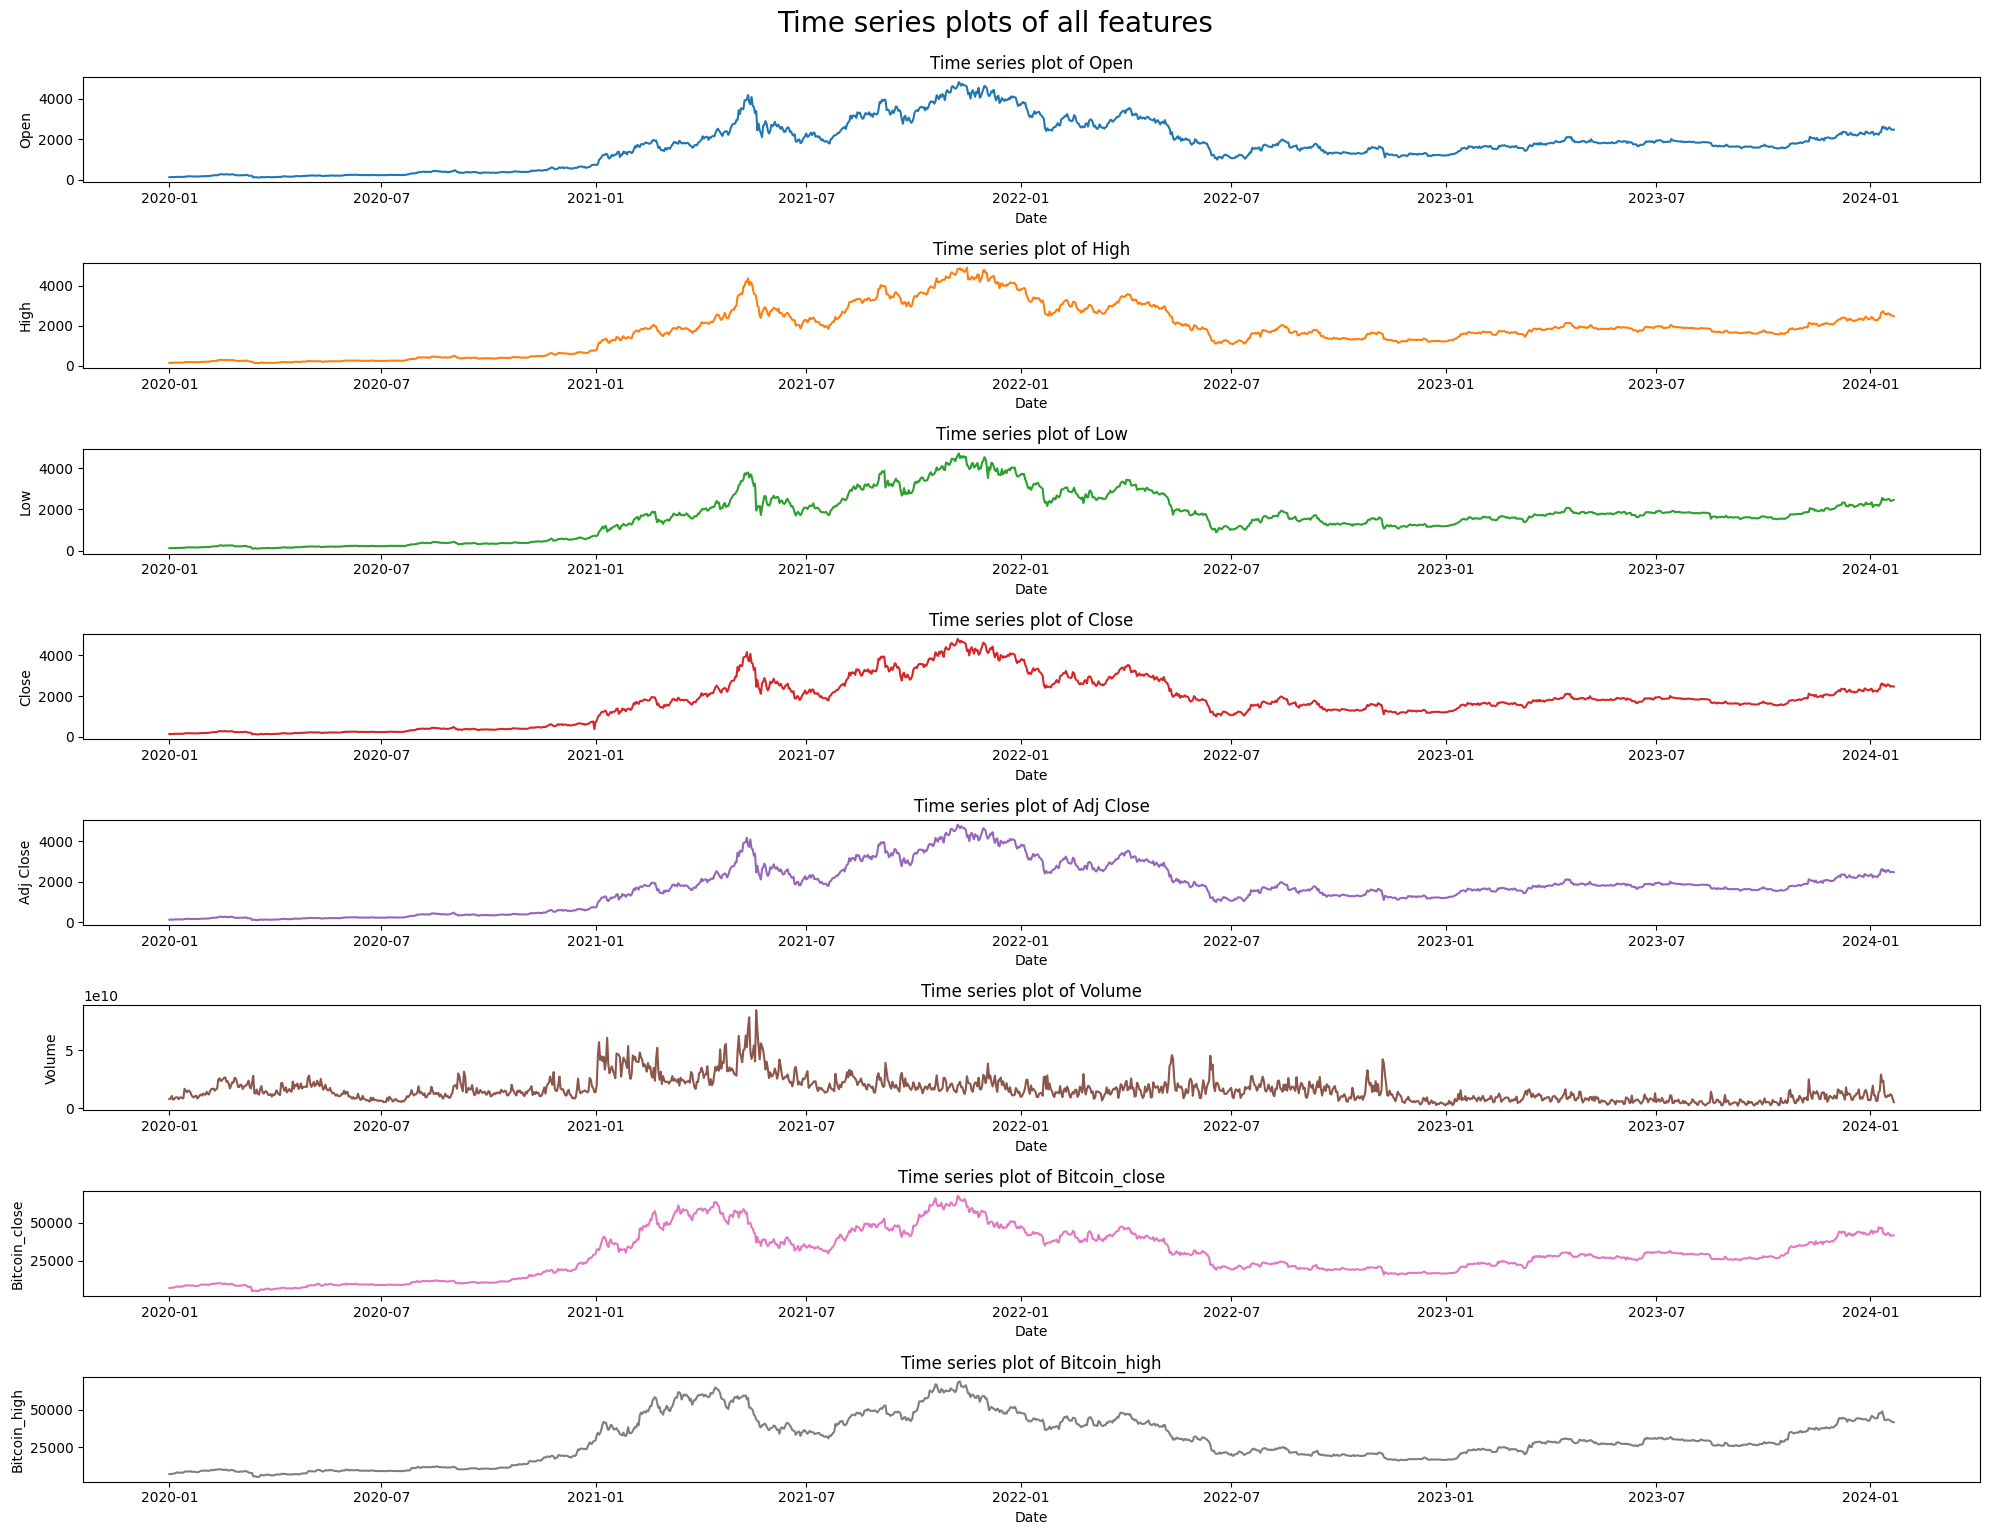

In [17]:
import seaborn as sns

plt.figure(figsize=(20, 15))

for i, col in enumerate(ethereum_ts.columns, 1):
    plt.subplot(8, 1, i)
    plt.plot(ethereum_ts.index, ethereum_ts[col], label=col, color=sns.color_palette()[i - 1])
    plt.title(f"Time series plot of {col}")
    plt.xlabel("Date")
    plt.ylabel(col)  
    plt.tight_layout()

plt.suptitle("Time series plots of all features", fontsize=20, y=1.02)
plt.show()

- We take the first order percentage difference of the price levels to obtain daily price changes. 
- Additionally, we calculate the rolling mean as well as the rolling standard deviation of the daily price changes over time.

# Normalize the data

- In the above Figure , we can see that neither the mean nor the standard deviation of daily price changes are constant over time, hence the time series is not stationary.
- The time series shows strong, irregular dynamics in rollilng mean and rolling std deviaiton 

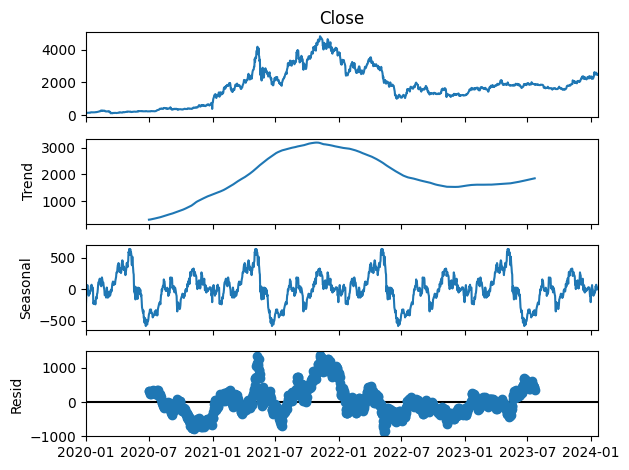

<Axes: xlabel='Date'>

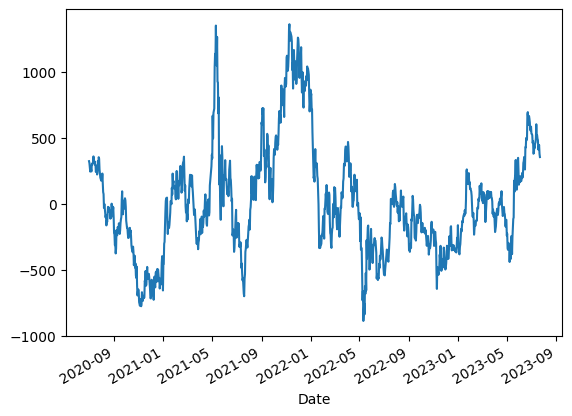

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

res= seasonal_decompose(ethereum_ts["Close"].dropna(), model="additive", period=365)
res.plot()
plt.show()
res.resid.plot()  


- From the  plot we see  residuals are spread randomly and do not show any obvious pattern indicating the seasonal decomposition was successfull
- TO confirm this we can also check if residuals show any autocorrelation or perform a ljung-box test.

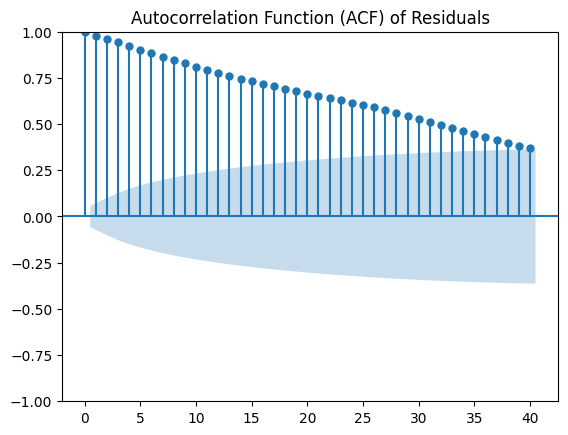

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import numpy as np


plot_acf(res.resid.dropna(), lags=40, ax=plt.gca(), title='Autocorrelation Function (ACF) of Residuals')
plt.show()
plot_pacf(res.resid.dropna(), lags=40, ax=plt.gca(), title='Partial Autocorrelation Function (PACF) of Residuals')
plt.show()






In [ ]:
# checking for variance
def plot_rollingstd(df: pd.DataFrame,column,window =254):
    
        rolling_std = df[column].rolling(window=window).std()
        plt.plot(df[column], label='Original')
        plt.plot(rolling_std, label='Rolling Std', color='red')
        plt.legend()
        plt.title("Rolling Standard Deviation")
        plt.show() 

plot_rollingstd(ethereum_ts,"Nmzd_Close",254)



- Now we derive three more features from the dataset, including the percentage difference between High and Low as a measure for intra-day price movement and the percentage difference between next-day Open and Close as a measure for overnight price movement. 

In [ ]:


#Percentage difference between High and Low (intra-day price movement)
ethereum_ts['Intraday_Price_movement'] = ((ethereum_ts['High'] - ethereum_ts['Low']) / ethereum_ts['Low']) * 100

#Percentage change in volume
#ts['volume_change'] = ts['Volume'].pct_change()

#Percentage difference between next-day Open and today's Close (overnight price movement)
ethereum_ts['Overnight_Price_movement'] = ((ethereum_ts['Open'].shift(-1) - ethereum_ts['Close']) / ethereum_ts['Close']) * 100

cols = ['Intraday_Price_movement', 'Overnight_Price_movement']

plt.figure(figsize=(15,10))
for i , col in enumerate(cols,1):
    plt.subplot(3,1,i)    
    plt.plot(ethereum_ts.index, ethereum_ts[col], label=col, color=sns.color_palette()[i - 1])
    plt.title(col)
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.tight_layout()  
    
plt.suptitle("Time series plots of intraday ,overnight percentage differences and volume changes", fontsize=20, y=1.02)
plt.show()

### Key Takeaways from Ethereum iNtraday and overnight Price Movements

- **Intraday volatility is high**, especially between 2018 and 2021, with some values exceedding 60%. This suggests that Ethereum experiences significant price swings during the trading day.The variability appears to decrease over time, suggesting a change in market conditions.

- **Overnight price movement is low and mean-reverting**, typically ranging between -2% and +2%. This indicates price stability during non-trading hours, making it more suitable for traditional time series modeling.

- **Volume Change Graph**:From 2017 to 2020, volume changes are small and stable.Post 2022, the variance in volume changes increases, with more frequent large spikes.Trading activity is increasing in recent years, and there's more variability in how much volume changes daily.

- **Volatility is not constant over time** — particularly for intraday movement. Distinct volatility clusters appear during market cycles, suggesting that time-varying volatility models (like GARCH or EWMA) would be more appropriate.

- **Intraday volatility shows a declining trend post-2022**, with fewer and less extreme spikes. This may reflect increased market maturity, greater liquidity, or reduced speculative behavior.

- **Overnight price changes appear more stationary** compared to intraday movements. This means overnight data is potentially easier to model with traditional statistical approaches without complex transformations.


- Ethereum experiences much greater price swings during the trading day compared to overnight. This suggests that the bulk of market activity, news reaction, and volatility occur within the trading day,

### Analyse some Technical Indicators 

| Category   | Indicator                    | Description                                   |
| ---------- | ---------------------------- | --------------------------------------------- |
| Trend      | **EMA** (Exponential MA)     | Shows smoothed price trends                   |
| Momentum   | **RSI** (Relative Strength)  | Measures speed/strength of price movement     |
| Volatility | **ATR** (Average True Range) | Measures market volatility                    |
| Volume     | **OBV** (On-Balance Volume)  | Tracks volume flow relative to price movement |



In [ ]:

import ta




#Add EMA (Trtsd indicator)
ethereum_ts['EMA'] = ta.trend.ema_indicator(close=ethereum_ts['Close'], window=60)

#Add RSI (Momentum indicator)
ethereum_ts['RSI'] = ta.momentum.rsi(close=ethereum_ts['Close'], window=60)

#Add ATR (Volatility indicator)
ethereum_ts['ATR'] = ta.volatility.average_true_range(high=ethereum_ts['High'], low=ethereum_ts['Low'], close=ethereum_ts['Close'], window=60)

#Add OBV (Volume indicator)
ethereum_ts['OBV'] = ta.volume.on_balance_volume(close=ethereum_ts['Close'], volume=ethereum_ts['Volume'])

# Preview the result
print(ethereum_ts[['Close', 'EMA', 'RSI', 'ATR', 'OBV']].tail())


In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

features =['Close',"High","Open","Volume"]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(ethereum_ts[features].dropna())

#scaler = StandardScaler()
#scaled_array = scaler.fit_transform(forecast_df[features].dropna())


ethereum_ts_scaled=pd.DataFrame(scaled_data, columns=features, index=ethereum_ts.dropna().index)

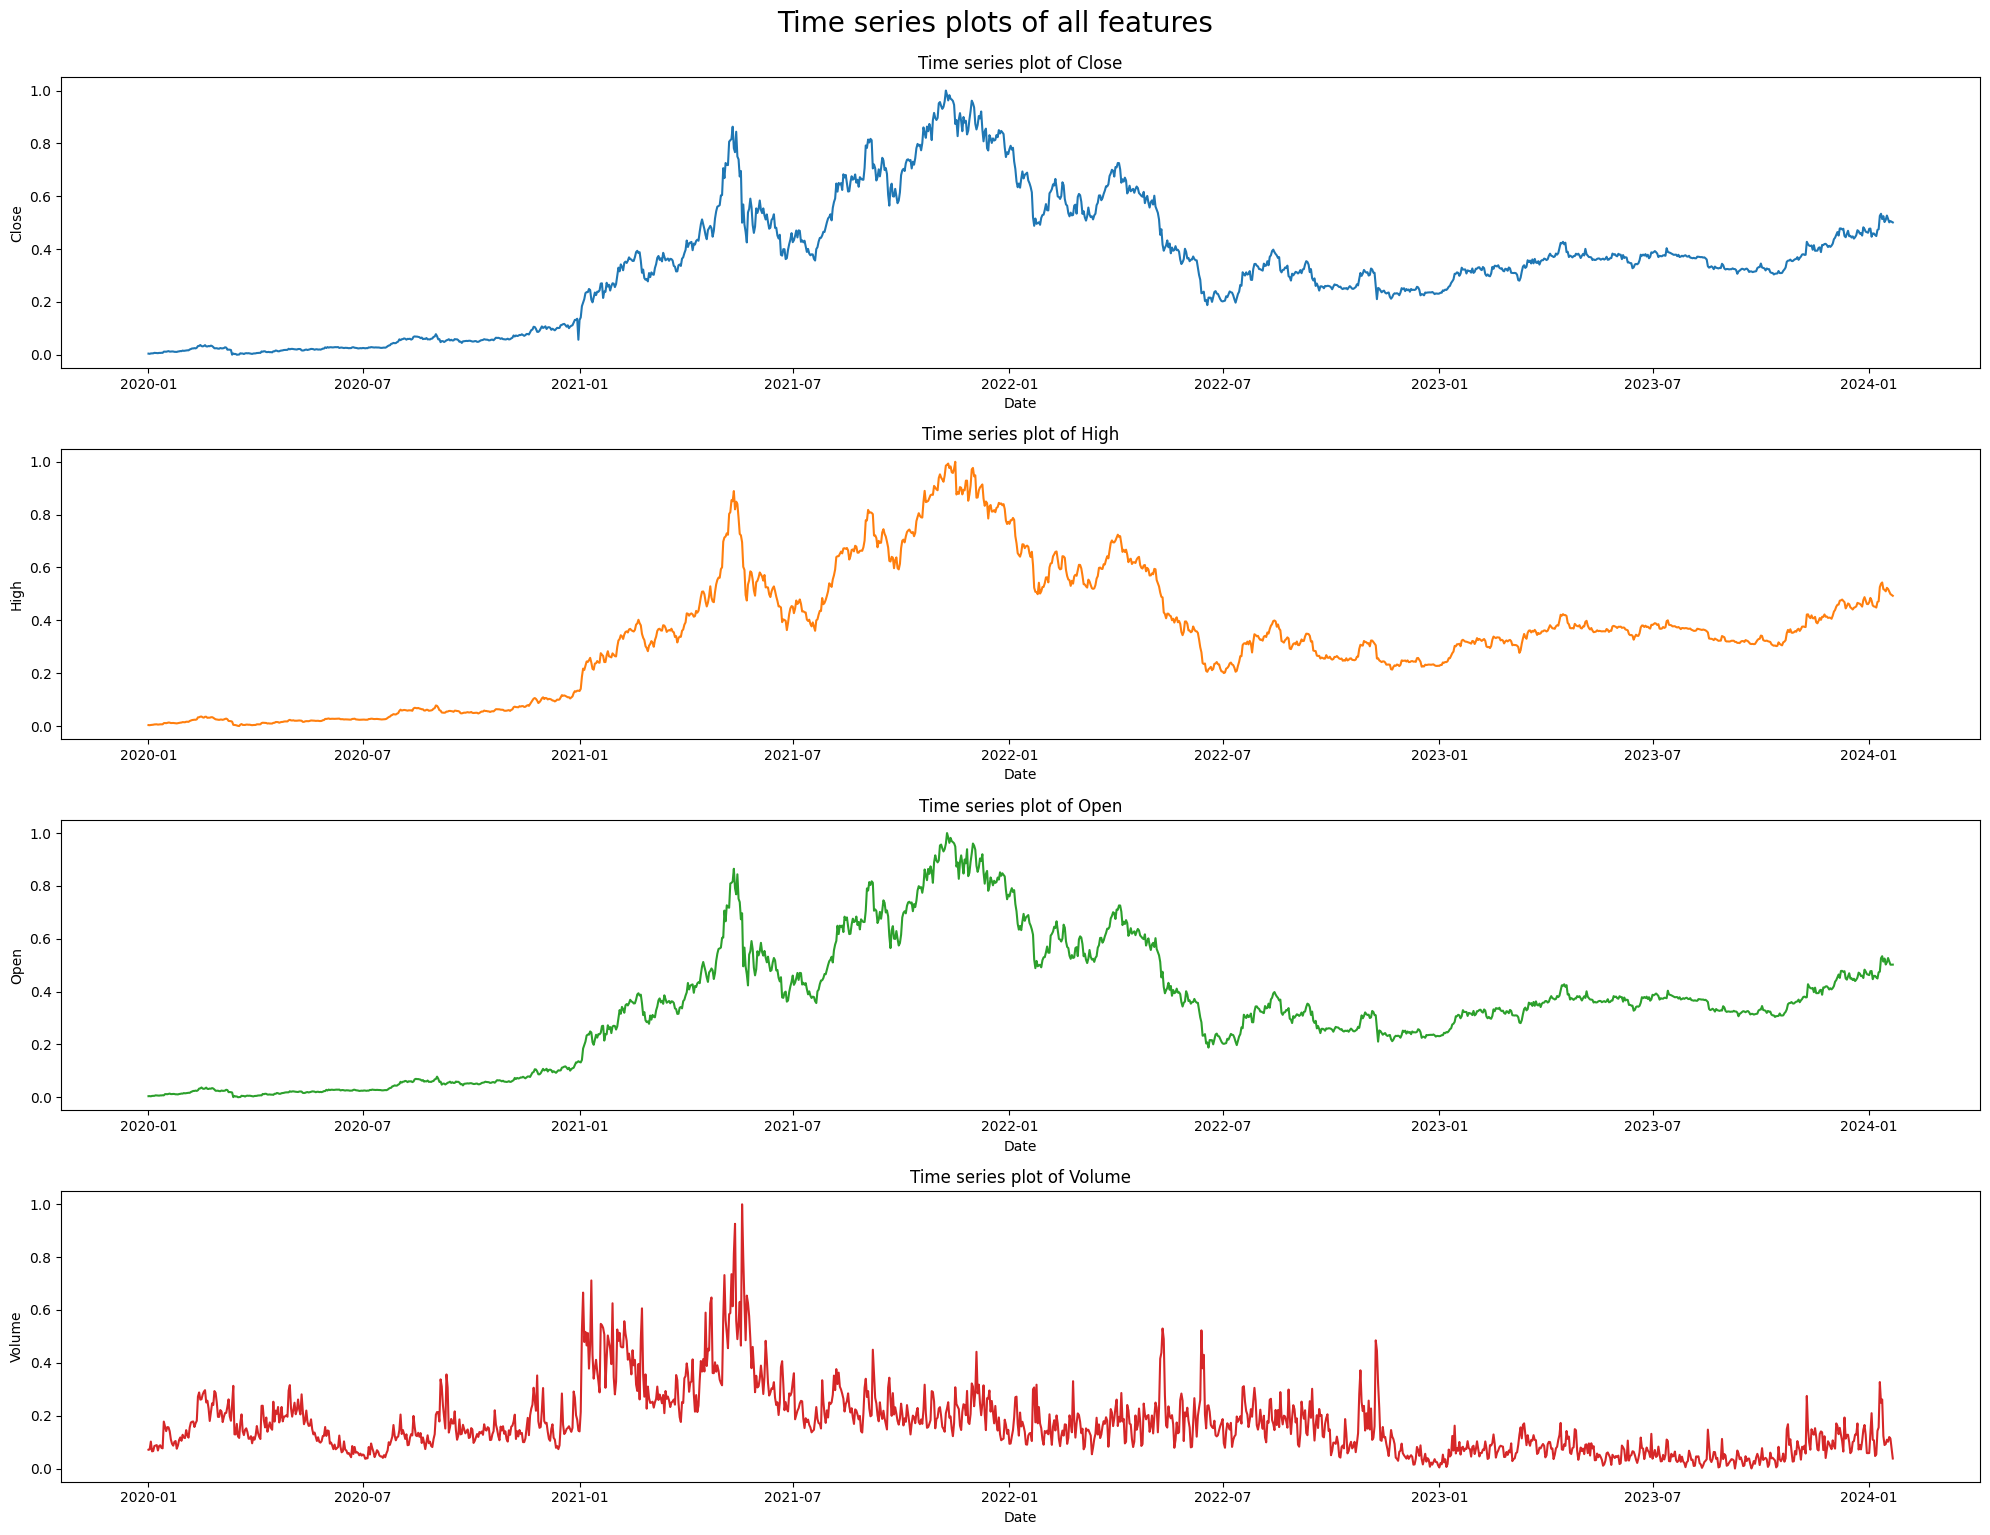

In [19]:
import seaborn as sns

plt.figure(figsize=(20, 15))

for i, col in enumerate(ethereum_ts_scaled.columns, 1):
    plt.subplot(4, 1, i)
    plt.plot(ethereum_ts_scaled.index, ethereum_ts_scaled[col], label=col, color=sns.color_palette()[i - 1])
    plt.title(f"Time series plot of {col}")
    plt.xlabel("Date")
    plt.ylabel(col)  
    plt.tight_layout()

plt.suptitle("Time series plots of all features", fontsize=20, y=1.02)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: for nicer visuals
sns.set_theme(style="darkgrid")

# Set up the figure and subplots
fig, axs = plt.subplots(4, 1, figsize=(16, 12), sharex=True)

# Plot 1: Close price with EMA
axs[0].plot(ethereum_ts['EMA'], label='EMA', color='orange')
axs[0].set_title('Ethereum Close Price & EMA')
axs[0].legend()

# Plot 2: RSI
axs[1].plot(ethereum_ts['RSI'], label='RSI', color='purple')
axs[1].axhline(70, linestyle='--', color='red', alpha=0.6, label='Overbought')
axs[1].axhline(30, linestyle='--', color='green', alpha=0.6, label='Oversold')
axs[1].set_title('Relative Strength Index (RSI)')
axs[1].legend()

# Plot 3: ATR
axs[2].plot(ethereum_ts['ATR'], label='ATR ', color='teal')
axs[2].set_title('Average True Range (Volatility)')
axs[2].legend()

# Plot 4: OBV
axs[3].plot(ethereum_ts['OBV'], label='On-Balance Volume', color='brown')
axs[3].set_title('On-Balance Volume (OBV)')
axs[3].legend()

# Formatting
plt.xlabel('Date')
plt.tight_layout()
plt.show()


### Interpretation of each technical indicator:


### **1. Close Price & EMA**

* **What it shows**: This compares the actual closing price of Ethereum with its 14-day Exponential Moving Average (EMA).
* **Insights**:

  * **Trend Detection**: The EMA tracks price trends smoothly. When the Close price is **consistently above EMA**, it indicates **bullish momentum**; when **below EMA**, bearish.
  * **Crossovers**: The crossover points (price crossing EMA) can signal potential entry/exit points.
  * **Post-2021 trends**: Ethereum's price shows clear **bullish trends** in 2021 followed by **corrections**, visible where the price dips below the EMA.

---

### **2. RSI  – Relative Strength Index**

* **What it shows**: RSI oscillates between 0 and 100, measuring **momentum**.
* **Insights**:

  * **Overbought (>70)**: Suggests that Ethereum may be overvalued and could see a pullback.
  * **Oversold (<30)**: Indicates potential undervaluation and possible buying opportunity.
  * **Observations**: RSI rarely breaches the 70/30 thresholds, which suggests **moderate momentum**, with some spikes around 2021 correlating with major rallies.

---

### **3. ATR – Average True Range**

* **What it shows**: Measures **volatility**, not direction.
* **Insights**:

  * **Low ATR** = Low volatility/stable market.
  * **High ATR** = High volatility/large price swings.
  * **Observation**: Notice huge spikes in **late 2020 and 2021**—this coincides with Ethereum’s rapid price increase, reflecting massive market movement.
  * **Post-2022**: ATR steadily declines, showing **reduced volatility**, potentially indicating market **maturity or consolidation**.

---

### **4. OBV – On-Balance Volume**

* **What it shows**: Measures **cumulative buying and selling pressure** based on volume and price direction.
* **Insights**:

  * **Upward OBV trend** = buying pressure, often precedes price increases.
  * **Flat or declining OBV** = weakening momentum.
  * **Observation**: OBV shows strong accumulation from late 2020 to mid-2021, aligning with Ethereum’s bull run. After 2022, OBV flattens, indicating **less aggressive buying** despite price fluctuations.

---

### Summary of Insights:

* The **bull market of 2020–2021** is clearly visible across all indicators.
* **Post-2022**, Ethereum appears to:

  * Be **less volatile** (lower ATR),
  * Exhibit **sideways momentum** (RSI),
  * Show **flattening volume accumulation** (OBV),
  * And **less separation** between price and EMA — suggesting a more stable or consolidating phase.



#### Determining Predictable Power between close and other variables  using Granger Causality test.
- The test runs regressions for lag 1 to lag 5 (you can set maxlag).

- For each lag, it tests whether lagged values of the second column (Volume) help explain the first (Close).

- Granger causality doesn’t mean true "cause and effect." Instead, it tests predictive power:

- If feature X Granger-causes Y, it means that past values of X contain information that helps predict future values of Y, above and beyond what past values of Y alone can provide.

- p < 0.05 → Strong evidence of Granger causality  

- p > 0.05 → No significant predictive relationship


In [238]:
all_cols=[ "Close","High","Volume","Open"]

from statsmodels.tsa.stattools import adfuller
for column in all_cols:

        result_adfuller = adfuller(ethereum_ts_scaled[column].dropna() )
        #print("ADF Statistic:","" result_adfuller[0])
        #print("p-value:", result_adfuller[1])
        #print("Critical Values:", result_adfuller[4])# this prints the critical values as key_value pair 
        if result_adfuller[0]>(result_adfuller[4])['5%']:
            print(f"The time seriess is Non_Stationary for {column}")
        else:
            print(f"THe result is stationary for {column} ")

THe result is stationary for Close 
THe result is stationary for High 
THe result is stationary for Volume 
THe result is stationary for Open 


In [102]:
#First we difference \our series to ensure stationarity before using Granger causality.




non_stationary_cols=["Open"]
for col in non_stationary_cols:

    ethereum_ts_scaled[col] = ethereum_ts_scaled[col].diff()
    

    
    #ts[col] = ts[col] - ts[col].shift(1)


In [103]:

from statsmodels.tsa.stattools import adfuller
for column in non_stationary_cols:

        result_adfuller = adfuller(ethereum_ts_scaled[column].dropna() )
        #print("ADF Statistic:", result_adfuller[0])
        #print("p-value:", result_adfuller[1])
        #print("Critical Values:", result_adfuller[4])# this prints the critical values as key_value pair 
        if result_adfuller[0]>(result_adfuller[4])['5%']:
            print(f"The time seriess is Non_Stationary for {column}")
        else:
            print(f"THe result is stationary for {column} ")

THe result is stationary for Open 


# to check whether the dataset is fit for the var modeling we use grangers caudsality test
To understand when to use Granger causality testing, it helps to consider what Granger causality doesn’t tell us. Granger causality only provides information about forecasting ability, it does not provide insight into the true causal relationship between two variables.

This should be considered in conjunction with some of the statistical requirements for using Granger causality testing.

In particular, we should use Granger causality testing when:

We are interested in forecasting performance, not the theoretical model behind the forecast.
Our data is stationary.

In [239]:
from statsmodels.tsa.stattools import grangercausalitytests


df = ethereum_ts_scaled[all_cols].dropna()

for col in all_cols:
    if col == "Close":
        continue  # Skip testing Close against it
   
    print(f"\nTesting whether {col} Granger-causes Close?:")
    granger = grangercausalitytests(df[[col, "Close"]], maxlag=10, verbose=True)



Testing whether High Granger-causes Close?:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=757.3462, p=0.0000  , df_denom=1476, df_num=1
ssr based chi2 test:   chi2=758.8855, p=0.0000  , df=1
likelihood ratio test: chi2=612.5504, p=0.0000  , df=1
parameter F test:         F=757.3462, p=0.0000  , df_denom=1476, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=491.1800, p=0.0000  , df_denom=1473, df_num=2
ssr based chi2 test:   chi2=985.6946, p=0.0000  , df=2
likelihood ratio test: chi2=755.2170, p=0.0000  , df=2
parameter F test:         F=491.1800, p=0.0000  , df_denom=1473, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=353.3126, p=0.0000  , df_denom=1470, df_num=3
ssr based chi2 test:   chi2=1064.9852, p=0.0000  , df=3
likelihood ratio test: chi2=801.9111, p=0.0000  , df=3
parameter F test:         F=353.3126, p=0.0000  , df_denom=1470, df_num=3

Granger Causality
number of lags (no zero

i:\CQAI\TSA\.venv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
i:\CQAI\TSA\.venv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=8.2039  , p=0.0000  , df_denom=1464, df_num=5
ssr based chi2 test:   chi2=41.3275 , p=0.0000  , df=5
likelihood ratio test: chi2=40.7592 , p=0.0000  , df=5
parameter F test:         F=8.2039  , p=0.0000  , df_denom=1464, df_num=5

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=5.0783  , p=0.0000  , df_denom=1461, df_num=6
ssr based chi2 test:   chi2=30.7410 , p=0.0000  , df=6
likelihood ratio test: chi2=30.4248 , p=0.0000  , df=6
parameter F test:         F=5.0783  , p=0.0000  , df_denom=1461, df_num=6

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=5.1494  , p=0.0000  , df_denom=1458, df_num=7
ssr based chi2 test:   chi2=36.4163 , p=0.0000  , df=7
likelihood ratio test: chi2=35.9735 , p=0.0000  , df=7
parameter F test:         F=5.1494  , p=0.0000  , df_denom=1458, df_num=7

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=4.9811  , p=0.0000  , df_denom=1455, df_num=8
ssr based chi2

i:\CQAI\TSA\.venv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


significant features : high , low, open, volume, intraday_price_movement

we will take : high, volume and intraday price movement for var modeling of close 

In [240]:
forecast_df = df[all_cols].copy()

In [241]:
'''from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
features =['Close',"Bitcoin_close","High","Intraday_Price_movement"]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(forecast_df[features].dropna())

#scaler = StandardScaler()
#scaled_array = scaler.fit_transform(forecast_df[features].dropna())


forecast_df_scaled=pd.DataFrame(scaled_data, columns=features, index=forecast_df.dropna().index)'''

'from sklearn.preprocessing import StandardScaler\nfrom sklearn.preprocessing import MinMaxScaler\nfeatures =[\'Close\',"Bitcoin_close","High","Intraday_Price_movement"]\n\nscaler = MinMaxScaler()\nscaled_data = scaler.fit_transform(forecast_df[features].dropna())\n\n#scaler = StandardScaler()\n#scaled_array = scaler.fit_transform(forecast_df[features].dropna())\n\n\nforecast_df_scaled=pd.DataFrame(scaled_data, columns=features, index=forecast_df.dropna().index)'

In [242]:
forecast_df

,Close,High,Volume,Open
Date,,,,
2020-01-02,-0.000721,-0.000422,0.072221,0.000253
2020-01-03,0.001438,0.000782,0.101882,-0.000725
2020-01-04,0.000191,0.000314,0.064917,0.001438
2020-01-05,0.000257,0.000703,0.066080,0.000192
2020-01-06,0.001707,0.001030,0.085097,0.000262
...,...,...,...,...
2024-01-16,0.016235,0.013150,0.108999,0.008290
2024-01-17,-0.012618,-0.004362,0.101447,0.016260
2024-01-18,-0.013049,-0.009731,0.119154,-0.012437


In [243]:

 
train = forecast_df[:int(0.9*(len(df)))]#90 %percent for train
test = forecast_df[int(0.9*(len(df))):]#10% percent for test


In [244]:
print(train.shape)
test.shape

(1332, 4)


(148, 4)

Forecasts from VAR models are quite flexible because they can be made conditional on the potential future paths of specified variables in the model.

In [245]:
'''# STEP 2: Fit the VAR model on training data

from statsmodels.tsa.statespace.varmax import VARMAX
eth_features =["Close","High","Intraday_Price_movement"]
btc_features =["Bitcoin_close"]

endog_data = train[eth_features]
exog_data = train[btc_features]
#if there are any mismatched or missing timestamps between ETH and BTC data, this ensures they are properly synchronized.

#join='inner' keeps only rows with timestamps common to both datasets.


endog_data, exog_data = endog_data.align(exog_data, join='inner', axis=0)
model = VARMAX(endog=endog_data, exog=exog_data, order=(7, 0))'''



'# STEP 2: Fit the VAR model on training data\n\nfrom statsmodels.tsa.statespace.varmax import VARMAX\neth_features =["Close","High","Intraday_Price_movement"]\nbtc_features =["Bitcoin_close"]\n\nendog_data = train[eth_features]\nexog_data = train[btc_features]\n#if there are any mismatched or missing timestamps between ETH and BTC data, this ensures they are properly synchronized.\n\n#join=\'inner\' keeps only rows with timestamps common to both datasets.\n\n\nendog_data, exog_data = endog_data.align(exog_data, join=\'inner\', axis=0)\nmodel = VARMAX(endog=endog_data, exog=exog_data, order=(7, 0))'

In [246]:
from statsmodels.tsa.api import VAR
model = VAR(train,freq='D')  # 'D' for daily frequency


In [322]:
model.select_order(maxlags =70).summary()

,AIC,BIC,FPE,HQIC
0,-28.85,-28.83,2.957e-13,-28.84
1,-34.20,-34.12,1.400e-15,-34.17
2,-34.59,-34.45,9.484e-16,-34.54
3,-34.82,-34.61,7.542e-16,-34.74
4,-34.98,-34.70,6.441e-16,-34.87
5,-35.07,-34.73,5.890e-16,-34.94
6,-35.16,-34.75*,5.386e-16,-35.00
7,-35.19,-34.72,5.218e-16,-35.01
8,-35.21,-34.67,5.116e-16,-35.01
9,-35.24,-34.64,4.942e-16,-35.02


In [32]:
'''from statsmodels.tsa.api import VAR

combined = train[eth_features + btc_features]
order_selection = VAR(combined).select_order(maxlags=10)
print(order_selection.summary())
'''

'from statsmodels.tsa.api import VAR\n\ncombined = train[eth_features + btc_features]\norder_selection = VAR(combined).select_order(maxlags=10)\nprint(order_selection.summary())\n'

bic is low at 17 so we consider that lag

In [355]:
results = model.fit(20)

results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 25, Jun, 2025
Time:                     19:43:02
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -34.2591
Nobs:                     1312.00    HQIC:                  -35.0585
Log likelihood:           16190.5    FPE:                3.68329e-16
AIC:                     -35.5382    Det(Omega_mle):     2.89846e-16
--------------------------------------------------------------------
Results for equation Close
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              0.000058         0.001049            0.055           0.956
L1.Close          -0.012040         0.049203           -0.245           0.807
L1.High           -0.123884         0.087543           -1.415           

In [356]:
lag= results.k_ar
print("Lag order:", lag)

Lag order: 20


In [364]:
import pandas as pd

n_obs = 5
#exog_future = exog_data[-n_obs:]  # You need exog data for the forecast horizon

#forecast = results.forecast(steps=n_obs, exog=exog_future)


input_data = train.values[-lag:]  # last k observations
forecast = results.forecast(y=input_data, steps=n_obs)

print("Forecasted values:\n", forecast)


Forecasted values:
 [[-0.00412351 -0.00310562  0.02384517 -0.00151535]
 [ 0.00197396 -0.0010415   0.02437139 -0.00353547]
 [ 0.00140136  0.00276474  0.04249775  0.00145137]
 [ 0.00551982  0.00350519  0.04487527  0.00141855]
 [-0.00132835  0.00064465  0.04893918  0.00558925]]


In [365]:
'''# Example: convert predictions back to original scale
eth_close_forecast_scaled = model.forecast(...)[:, 0]  # assuming ETH_Close is first
eth_close_forecast = scaler.inverse_transform([eth_close_forecast_scaled])[0]'''


'# Example: convert predictions back to original scale\neth_close_forecast_scaled = model.forecast(...)[:, 0]  # assuming ETH_Close is first\neth_close_forecast = scaler.inverse_transform([eth_close_forecast_scaled])[0]'

In [366]:
forecast.shape

(5, 4)

In [367]:
test_new =test[:n_obs]
test_new

,Close,High,Volume,Open
Date,,,,
2023-08-26,-0.001410,-0.003600,0.004146,-0.001562
2023-08-27,0.002384,0.000940,0.006583,-0.001416
2023-08-28,-0.001075,0.000013,0.033664,0.002376
2023-08-29,0.016435,0.017444,0.111931,-0.001099
2023-08-30,-0.005235,-0.002528,0.035707,0.016470


In [368]:
# Convert to DataFrame
forecasted_df = pd.DataFrame(forecast, index=test_new.index, columns=forecast_df.columns)

# Print forecasts
print(forecasted_df.head())

               Close      High    Volume      Open
Date                                              
2023-08-26 -0.004124 -0.003106  0.023845 -0.001515
2023-08-27  0.001974 -0.001041  0.024371 -0.003535
2023-08-28  0.001401  0.002765  0.042498  0.001451
2023-08-29  0.005520  0.003505  0.044875  0.001419
2023-08-30 -0.001328  0.000645  0.048939  0.005589


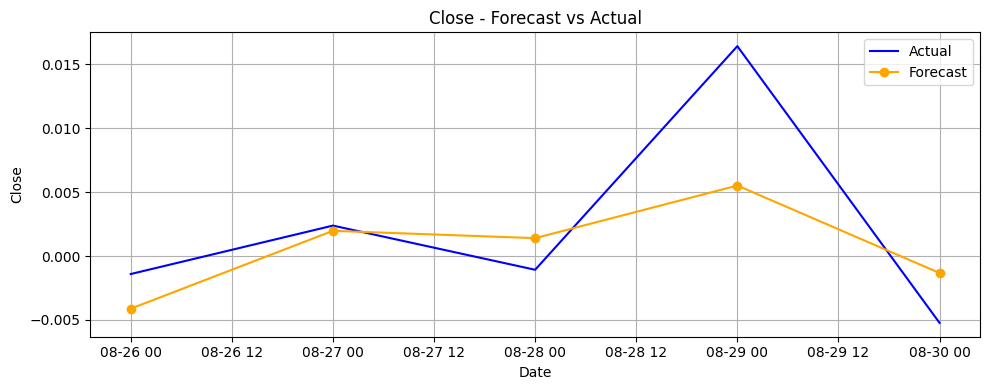

In [369]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

# Plot actual and forecasted values
plt.plot(test_new.index[:n_obs], test_new["Close"].iloc[:n_obs], label='Actual', color='blue')
plt.plot(forecasted_df.index, forecasted_df["Close"], label='Forecast', color='orange', marker='o')

plt.title(f"{"Close"} - Forecast vs Actual") 
plt.xlabel("Date")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [370]:
from sklearn.metrics import  mean_absolute_error, r2_score





mae = mean_absolute_error(test_new['Close'], forecasted_df['Close'])
r2 = r2_score(test_new['Close'],  forecasted_df['Close'])
print(f"{'Close'}: MAE={mae:.2f}, R² = {r2:.4f}")


Close: MAE=0.00, R² = 0.4744


In [236]:
test_new["Close"]

Date
2023-08-26   -0.001410
2023-08-27    0.002384
2023-08-28   -0.001075
2023-08-29    0.016435
2023-08-30   -0.005235
2023-08-31   -0.012650
2023-09-01   -0.003647
2023-09-02    0.001815
2023-09-03   -0.000193
2023-09-04   -0.001375
2023-09-05    0.000845
2023-09-06   -0.000293
2023-09-07    0.003264
2023-09-08   -0.002438
2023-09-09   -0.000207
2023-09-10   -0.003900
2023-09-11   -0.013866
2023-09-12    0.008676
2023-09-13    0.003309
2023-09-14    0.004038
Name: Close, dtype: float64

In [371]:
from sklearn.metrics import mean_squared_error
import math 
from statistics import mean

rmse_close=math.sqrt(mean_squared_error(forecasted_df['Close'],test_new['Close']))
print('Mean value of close is : {}. Root Mean Squared Error is :{}'.format(mean(test_new['Close']),rmse_close))


Mean value of close is : 0.0022196034878859904. Root Mean Squared Error is :0.005441846808971947


In [ ]:
forecasted_df.shape

In [ ]:
model_coeff=pd.DataFrame([results.params["Close"],results.pvalues["Close"]]).T


In [ ]:
model_coeff.columns=["Coefficients","p_values"]
#model_coeff.query("p_values<0.05")

model_coeff["Significant"] = np.where(model_coeff["p_values"] < 0.05, 1, 0)


In [ ]:
model_coeff

In [ ]:
coeff_arr =model_coeff["Coefficients"][1:].values
#coeff_arr=np.multiply(model_coeff["Coefficients"].values[1:]   ,model_coeff["Significant"].values[1:])

In [ ]:
coeff_arr.shape  #3 features 10 lags =30 coeffs

In [ ]:
coeff_arr

In [ ]:
to_arr =train[-lag:][::-1].stack().to_frame().T.values

In [ ]:
np.dot(to_arr,coeff_arr)+model_coeff["Coefficients"][:1].values